# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

responses = [] # stores responses for postal codes
lat = []
max_temp = []
min_temp = []
temp = []
cloudiness = []
wind_speed =[]

for city in range(len(cities)):
    rr = requests.get(url + 'appid=' + weather_api_key + '&q=' +str(cities[city]))
    responses.append(rr.json())
    


In [5]:
responses

[{'coord': {'lon': -73.97, 'lat': 42.6},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 265.2,
   'feels_like': 259.97,
   'temp_min': 262.59,
   'temp_max': 267.15,
   'pressure': 1015,
   'humidity': 85},
  'visibility': 16093,
  'wind': {'speed': 3.1, 'deg': 300},
  'clouds': {'all': 90},
  'dt': 1583027985,
  'sys': {'type': 1,
   'id': 5137,
   'country': 'US',
   'sunrise': 1582975951,
   'sunset': 1583016268},
  'timezone': -18000,
  'id': 5106841,
  'name': 'Albany',
  'cod': 200},
 {'coord': {'lon': 73.08, 'lat': -0.6},
  'weather': [{'id': 500,
    'main': 'Rain',
    'description': 'light rain',
    'icon': '10d'}],
  'base': 'stations',
  'main': {'temp': 301.31,
   'feels_like': 302.81,
   'temp_min': 301.31,
   'temp_max': 301.31,
   'pressure': 1011,
   'humidity': 78,
   'sea_level': 1011,
   'grnd_level': 1011},
  'wind': {'speed': 6.12, 'deg': 44},
  'rain': {'3h': 0.1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:

df = pd.DataFrame(responses)
df.head()


,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,id,name,cod,rain,message,snow
0,"{'lon': -73.97, 'lat': 42.6}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 265.2, 'feels_like': 259.97, 'temp_mi...",16093.0,"{'speed': 3.1, 'deg': 300}",{'all': 90},1.583028e+09,"{'type': 1, 'id': 5137, 'country': 'US', 'sunr...",-18000.0,5106841.0,Albany,200,NaN,NaN,NaN
1,"{'lon': 73.08, 'lat': -0.6}","[{'id': 500, 'main': 'Rain', 'description': 'l...",stations,"{'temp': 301.31, 'feels_like': 302.81, 'temp_m...",NaN,"{'speed': 6.12, 'deg': 44}",{'all': 54},1.583028e+09,"{'country': 'MV', 'sunrise': 1583025390, 'suns...",18000.0,1282256.0,Hithadhoo,200,{'3h': 0.13},NaN,NaN
2,"{'lon': 82.73, 'lat': 51.67}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 269.23, 'feels_like': 265.03, 'temp_m...",NaN,"{'speed': 1.96, 'deg': 107}",{'all': 89},1.583028e+09,"{'country': 'RU', 'sunrise': 1583025266, 'suns...",25200.0,1502066.0,Krasnoshchekovo,200,NaN,NaN,NaN
3,"{'lon': 142.17, 'lat': 49.63}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 263.6, 'feels_like': 257.34, 'temp_mi...",NaN,"{'speed': 4.41, 'deg': 343}",{'all': 0},1.583028e+09,"{'country': 'RU', 'sunrise': 1583010873, 'suns...",39600.0,2126493.0,Boshnyakovo,200,NaN,NaN,NaN
4,"{'lon': -156.47, 'lat': 20.89}","[{'id': 500, 'main': 'Rain', 'description': 'l...",stations,"{'temp': 294.45, 'feels_like': 290.81, 'temp_m...",12874.0,"{'speed': 7.7, 'deg': 80, 'gust': 13.9}",{'all': 40},1.583028e+09,"{'type': 1, 'id': 7879, 'country': 'US', 'sunr...",-36000.0,5847411.0,Kahului,200,NaN,NaN,NaN


In [10]:

coord = df['coord']
clouds = df['clouds']
main = df['main']
wind = df['wind']
sys = df['sys']

df['lat']=coord.str["lat"]
df['lon']=coord.str["lon"]
df['temp']=main.str['temp']
df['temp_min'] = main.str['temp_min']
df['temp_max'] = main.str['temp_max']
df['cloudiness'] = clouds.str['all']
df['wind_speed'] = wind.str['speed']
df['wind_direction'] = wind.str['deg']
df['humidity'] = main.str['humidity']
df['Country'] = sys.str['country']
df.head()



,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,...,lat,lon,temp,temp_min,temp_max,cloudiness,wind_speed,wind_direction,humidity,Country
0,"{'lon': -73.97, 'lat': 42.6}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 265.2, 'feels_like': 259.97, 'temp_mi...",16093.0,"{'speed': 3.1, 'deg': 300}",{'all': 90},1.583028e+09,"{'type': 1, 'id': 5137, 'country': 'US', 'sunr...",-18000.0,...,42.60,-73.97,265.20,262.59,267.15,90.0,3.10,300.0,85.0,US
1,"{'lon': 73.08, 'lat': -0.6}","[{'id': 500, 'main': 'Rain', 'description': 'l...",stations,"{'temp': 301.31, 'feels_like': 302.81, 'temp_m...",NaN,"{'speed': 6.12, 'deg': 44}",{'all': 54},1.583028e+09,"{'country': 'MV', 'sunrise': 1583025390, 'suns...",18000.0,...,-0.60,73.08,301.31,301.31,301.31,54.0,6.12,44.0,78.0,MV
2,"{'lon': 82.73, 'lat': 51.67}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 269.23, 'feels_like': 265.03, 'temp_m...",NaN,"{'speed': 1.96, 'deg': 107}",{'all': 89},1.583028e+09,"{'country': 'RU', 'sunrise': 1583025266, 'suns...",25200.0,...,51.67,82.73,269.23,269.23,269.23,89.0,1.96,107.0,78.0,RU
3,"{'lon': 142.17, 'lat': 49.63}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 263.6, 'feels_like': 257.34, 'temp_mi...",NaN,"{'speed': 4.41, 'deg': 343}",{'all': 0},1.583028e+09,"{'country': 'RU', 'sunrise': 1583010873, 'suns...",39600.0,...,49.63,142.17,263.60,263.60,263.60,0.0,4.41,343.0,85.0,RU
4,"{'lon': -156.47, 'lat': 20.89}","[{'id': 500, 'main': 'Rain', 'description': 'l...",stations,"{'temp': 294.45, 'feels_like': 290.81, 'temp_m...",12874.0,"{'speed': 7.7, 'deg': 80, 'gust': 13.9}",{'all': 40},1.583028e+09,"{'type': 1, 'id': 7879, 'country': 'US', 'sunr...",-36000.0,...,20.89,-156.47,294.45,292.04,296.15,40.0,7.70,80.0,69.0,US


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Temp')

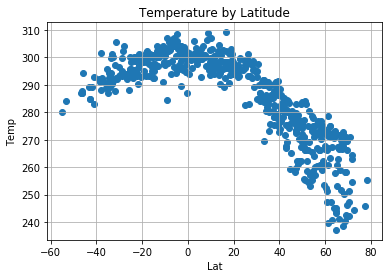

In [8]:
plt.scatter(df['lat'], df['temp'])
plt.title('Temperature by Latitude')
plt.grid()
plt.xlabel('Lat')
plt.ylabel('Temp')

#### Latitude vs. Humidity Plot

In [9]:
# Loop through the list of cities and perform a request for data on each


Text(0, 0.5, 'Humidity')

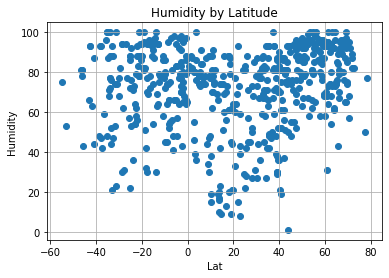

In [10]:
plt.scatter(df['lat'], df['humidity'])
plt.title('Humidity by Latitude')
plt.grid()
plt.xlabel('Lat')
plt.ylabel('Humidity')

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

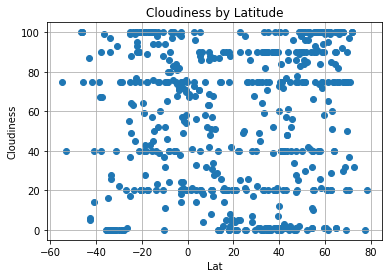

In [11]:
plt.scatter(df['lat'], df['cloudiness'])
plt.title('Cloudiness by Latitude')
plt.grid()
plt.xlabel('Lat')
plt.ylabel('Cloudiness')

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

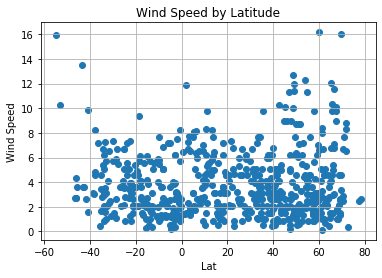

In [12]:
plt.scatter(df['lat'], df['wind_speed'])
plt.title('Wind Speed by Latitude')
plt.grid()
plt.xlabel('Lat')
plt.ylabel('Wind Speed')

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots


In [14]:
# Create Northern and Southern Hemisphere DataFrames
north = df['lat'] >= 0
north_df = df[north]
south = df['lat'] <= 0
south_df = df[south]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

-0.7171479134836068 309.0685190524863 -0.8763479309879361 1.8042451446068936e-125 0.01998548780737481


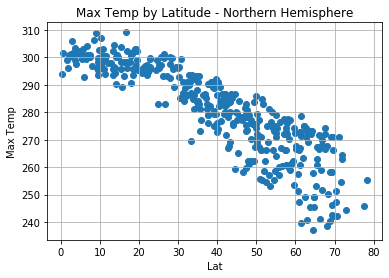

In [15]:
plt.scatter(north_df['lat'], north_df['temp_max'])
plt.title('Max Temp by Latitude - Northern Hemisphere')
plt.grid()
plt.xlabel('Lat')
plt.ylabel('Max Temp')

(aslope, aintercept, arvalue, apvalue, astderr) = stats.linregress(north_df['lat'], north_df['temp_max'])
print(aslope, aintercept, arvalue, apvalue, astderr)                                                            

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
(bslope, bintercept, brvalue, bpvalue, bstderr) = stats.linregress(south_df['lat'], south_df['temp_max'])
print(bslope, bintercept, brvalue, bpvalue, bstderr)                    

0.2652416101075901 302.40684631130836 0.6430545789337905 1.1264287205902652e-23 0.022976814660015735


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [17]:
(cslope, cintercept, crvalue, cpvalue, cstderr) = stats.linregress(north_df['lat'], north_df['humidity'])
print(cslope, cintercept, crvalue, cpvalue, cstderr)                    

0.399243022565859 56.05170486000107 0.3660997802417031 7.595913214563375e-14 0.051453477012756654


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [18]:
(dslope, dintercept, drvalue, dpvalue, dstderr) = stats.linregress(south_df['lat'], south_df['humidity'])
print(dslope, dintercept, drvalue, dpvalue, dstderr)                

0.12203680984203756 76.60714325814017 0.08411781062100765 0.24729205679409408 0.10515502479218566


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [19]:
(eslope, eintercept, ervalue, epvalue, estderr) = stats.linregress(north_df['lat'], north_df['cloudiness'])
print(eslope, eintercept, ervalue, epvalue, estderr)                    

0.512108396042394 31.59543047510425 0.273924729446528 3.6956611140271544e-08 0.0911629900036442


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [20]:
(fslope, fintercept, frvalue, fpvalue, fstderr) = stats.linregress(south_df['lat'], south_df['cloudiness'])
print(fslope, fintercept, frvalue, fpvalue, fstderr)                

0.5402898035542046 65.71263529047528 0.19894611493733533 0.005796496928259629 0.19359364853824587


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [21]:
(gslope, gintercept, grvalue, gpvalue, gstderr) = stats.linregress(north_df['lat'], north_df['wind_speed'])
print(gslope, gintercept, grvalue, gpvalue, gstderr)                    

0.0055236329778610375 3.815758206210558 0.039736319104265144 0.43331670499470776 0.007042376465177969


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [22]:
(hslope, hintercept, hrvalue, hpvalue, hstderr) = stats.linregress(south_df['lat'], south_df['wind_speed'])
print(hslope, hintercept, hrvalue, hpvalue, hstderr)                

-0.05389822891247122 2.553197707917535 -0.29122030018898293 4.36478132198538e-05 0.01287886987241621


In [11]:
df = df
df.to_csv( 'weather_data', index=False)  
